<a href="https://colab.research.google.com/github/Shamiul-693/-User-Behavior-Analysis-for-Optimizing-Engagement-on-Social-Media-Platforms-/blob/main/User_Behavior_Analysis_for_Optimizing_Engagement_on_Social_Media_Platforms_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import pandas as pd
from  sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
# Visualize correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('/content/drive/MyDrive/ User Behavior Analysis for Optimizing Engagement on Social Media  Platforms /SocialMediaUsersDataset.csv')

In [5]:
data.head()

,UserID,Name,Gender,DOB,Interests,City,Country
0,1,Jesse Lawhorn,Female,1958-10-15,"'Movies', 'Fashion', 'Fashion', 'Books'",Sibolga,Indonesia
1,2,Stacy Payne,Female,2004-07-21,"'Gaming', 'Finance and investments', 'Outdoor ...",Al Abyār,Libya
2,3,Katrina Nicewander,Female,2000-02-07,"'DIY and crafts', 'Music', 'Science', 'Fashion'",Wādī as Sīr,Jordan
3,4,Eric Yarbrough,Male,1985-04-14,"'Outdoor activities', 'Cars and automobiles'",Matera,Italy
4,5,Daniel Adkins,Female,1955-09-18,"'Politics', 'History'",Biruaca,Venezuela


In [9]:
data.describe()

,UserID
count,100000.000000
mean,50000.500000
std,28867.657797
min,1.000000
25%,25000.750000
50%,50000.500000
75%,75000.250000
max,100000.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   UserID     100000 non-null  int64 
 1   Name       100000 non-null  object
 2   Gender     100000 non-null  object
 3   DOB        100000 non-null  object
 4   Interests  100000 non-null  object
 5   City       100000 non-null  object
 6   Country    100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [14]:
print(data.columns)

Index(['UserID', 'Name', 'Gender', 'DOB', 'Interests', 'City', 'Country'], dtype='object')


In [16]:
print(data.isnull().sum())

UserID       0
Name         0
Gender       0
DOB          0
Interests    0
City         0
Country      0
dtype: int64


In [19]:
print(data[[ 'Name', 'Gender', 'DOB', 'Interests', 'City', 'Country']].describe())

              Name  Gender         DOB  Interests         City        Country
count       100000  100000      100000     100000       100000         100000
unique       92580       2       18536      53737        24452            244
top     John Smith    Male  2002-11-22  'Fashion'  Springfield  United States
freq            21   50069          17       1371           37          12311


# Visualizing User Activity Trends

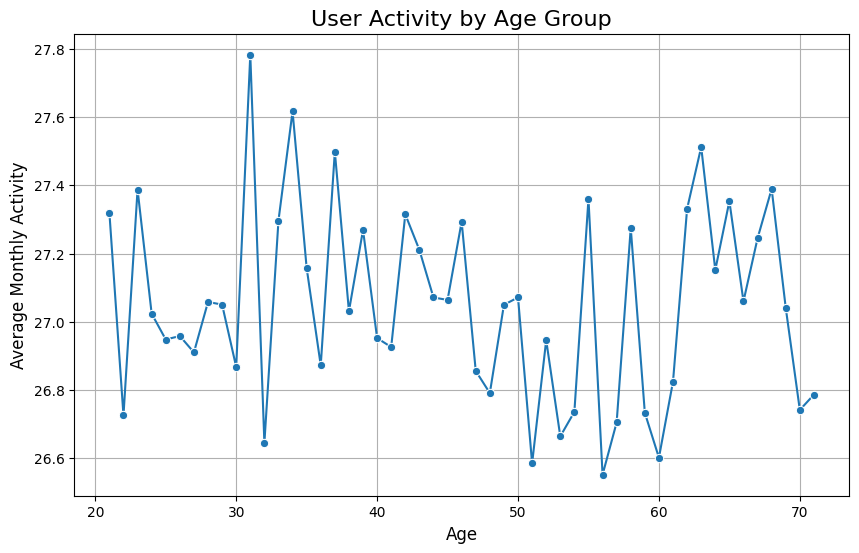

<ipython-input-28-0d9920786792>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_by_gender, x='Gender', y='Monthly_Activity', palette='coolwarm')


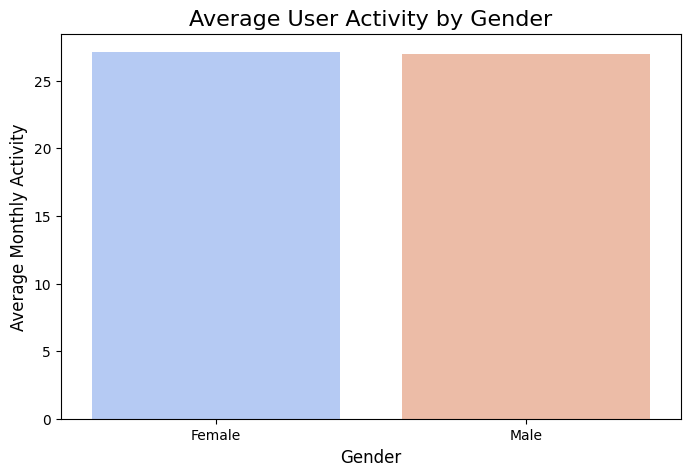

<ipython-input-28-0d9920786792>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x='City', y='Monthly_Activity', palette='viridis')


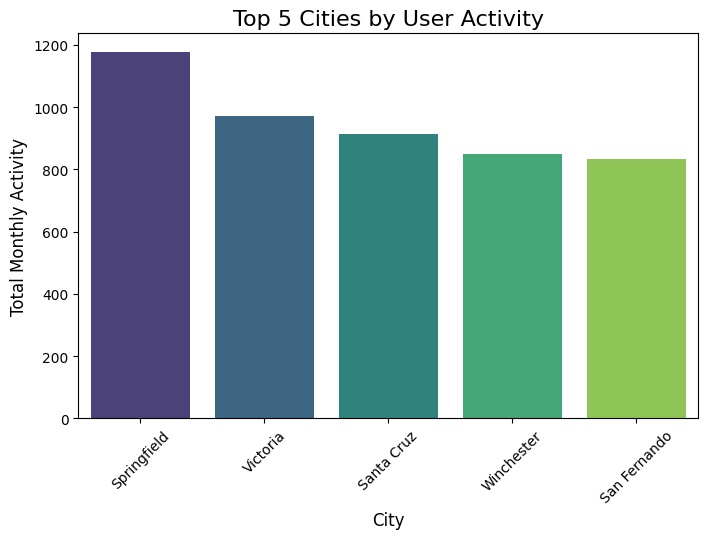

In [28]:
# Preprocessing: Calculate Age from DOB
data['DOB'] = pd.to_datetime(data['DOB'], errors='coerce')
current_year = datetime.now().year
data['Age'] = current_year - data['DOB'].dt.year

# Sample Data: Simulate User Activity Over Time (For Demo)

np.random.seed(42)
data['Monthly_Activity'] = np.random.randint(5, 50, size=len(data))  # Simulate activity counts

# Line Chart: Trends in User Activity Over Age
activity_by_age = data.groupby('Age')['Monthly_Activity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=activity_by_age, x='Age', y='Monthly_Activity', marker='o')
plt.title('User Activity by Age Group', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Monthly Activity', fontsize=12)
plt.grid(True)
plt.show()

# Bar Graph: Average Activity by Gender
activity_by_gender = data.groupby('Gender')['Monthly_Activity'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=activity_by_gender, x='Gender', y='Monthly_Activity', palette='coolwarm')
plt.title('Average User Activity by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Monthly Activity', fontsize=12)
plt.show()

# Bar Graph: Top 5 Cities by User Activity
top_cities = data.groupby('City')['Monthly_Activity'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=top_cities, x='City', y='Monthly_Activity', palette='viridis')
plt.title('Top 5 Cities by User Activity', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Monthly Activity', fontsize=12)
plt.xticks(rotation=45)
plt.show()
